<a href="https://colab.research.google.com/github/Dhwaj-054/lit-college-codes/blob/main/RS_Expt7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn -q
print("All libraries installed successfully!")

All libraries installed successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
np.random.seed(42)

# Generate user interactions
n_users = 100
n_items = 500
n_interactions = 5000

user_ids = np.random.randint(1, n_users + 1, n_interactions)
item_ids = np.random.randint(1, n_items + 1, n_interactions)
ratings = np.random.randint(1, 6, n_interactions)

# Generate timestamps (last 30 days)
base_date = datetime.now() - timedelta(days=30)
timestamps = [base_date + timedelta(
    days=np.random.randint(0, 30),
    hours=np.random.randint(0, 24),
    minutes=np.random.randint(0, 60)
) for _ in range(n_interactions)]

# Extract time of day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

time_of_day = [get_time_of_day(ts.hour) for ts in timestamps]

# Generate contextual data
locations = np.random.choice(['home', 'work', 'travel'], n_interactions, p=[0.5, 0.3, 0.2])
weather_conditions = np.random.choice(['sunny', 'rainy', 'cloudy'], n_interactions, p=[0.5, 0.25, 0.25])
moods = np.random.choice(['happy', 'sad', 'stressed', 'relaxed'], n_interactions, p=[0.4, 0.2, 0.2, 0.2])

# Create user interactions dataframe
user_interactions = pd.DataFrame({
    'user_id': user_ids,
    'item_id': item_ids,
    'rating': ratings,
    'timestamp': timestamps,
    'time_of_day': time_of_day,
    'user_location': locations,
    'weather_condition': weather_conditions,
    'user_mood': moods
})

print("User Interactions Dataset:")
print(user_interactions.head(10))
print(f"\nShape: {user_interactions.shape}")
print(f"\nTime of day distribution:\n{user_interactions['time_of_day'].value_counts()}")


User Interactions Dataset:
   user_id  item_id  rating                  timestamp time_of_day  \
0       52      369       5 2025-11-09 21:10:46.538585       night   
1       93      213       4 2025-10-30 10:20:46.538585     morning   
2       15      317       3 2025-11-03 03:41:46.538585       night   
3       72      137       5 2025-10-19 19:12:46.538585     evening   
4       61        6       1 2025-10-16 20:16:46.538585     evening   
5       21      499       2 2025-10-23 13:20:46.538585   afternoon   
6       83      109       2 2025-10-21 14:18:46.538585   afternoon   
7       87       35       2 2025-10-24 01:11:46.538585       night   
8       75       39       3 2025-10-22 21:54:46.538585       night   
9       75      150       1 2025-10-14 18:39:46.538585     evening   

  user_location weather_condition user_mood  
0          home             sunny     happy  
1          work            cloudy       sad  
2          work             sunny     happy  
3          home   

In [ ]:
# Item categories
categories = ['Entertainment', 'Food', 'Shopping', 'Exercise', 'Education',
              'Travel', 'Social', 'Work', 'Relaxation', 'Gaming']

item_metadata = pd.DataFrame({
    'item_id': range(1, n_items + 1),
    'title': [f'Item_{i}' for i in range(1, n_items + 1)],
    'category': np.random.choice(categories, n_items)
})

# Assign suitable contexts based on category
def assign_suitable_times(category):
    mapping = {
        'Entertainment': ['evening', 'night'],
        'Food': ['morning', 'afternoon', 'evening'],
        'Shopping': ['afternoon', 'evening'],
        'Exercise': ['morning', 'evening'],
        'Education': ['morning', 'afternoon'],
        'Travel': ['morning', 'afternoon'],
        'Social': ['afternoon', 'evening', 'night'],
        'Work': ['morning', 'afternoon'],
        'Relaxation': ['evening', 'night'],
        'Gaming': ['evening', 'night']
    }
    return mapping.get(category, ['morning', 'afternoon', 'evening', 'night'])

def assign_suitable_weather(category):
    mapping = {
        'Entertainment': ['rainy', 'cloudy', 'sunny'],
        'Food': ['sunny', 'rainy', 'cloudy'],
        'Shopping': ['sunny', 'cloudy'],
        'Exercise': ['sunny', 'cloudy'],
        'Education': ['sunny', 'rainy', 'cloudy'],
        'Travel': ['sunny'],
        'Social': ['sunny', 'cloudy'],
        'Work': ['sunny', 'rainy', 'cloudy'],
        'Relaxation': ['rainy', 'cloudy'],
        'Gaming': ['rainy', 'cloudy']
    }
    return mapping.get(category, ['sunny', 'rainy', 'cloudy'])

def assign_suitable_moods(category):
    mapping = {
        'Entertainment': ['happy', 'relaxed'],
        'Food': ['happy', 'sad', 'stressed', 'relaxed'],
        'Shopping': ['happy', 'stressed'],
        'Exercise': ['stressed', 'sad'],
        'Education': ['relaxed'],
        'Travel': ['happy', 'relaxed'],
        'Social': ['happy', 'relaxed'],
        'Work': ['stressed'],
        'Relaxation': ['sad', 'stressed', 'relaxed'],
        'Gaming': ['happy', 'relaxed']
    }
    return mapping.get(category, ['happy', 'sad', 'stressed', 'relaxed'])

def assign_suitable_locations(category):
    mapping = {
        'Entertainment': ['home', 'travel'],
        'Food': ['home', 'work', 'travel'],
        'Shopping': ['travel'],
        'Exercise': ['home', 'travel'],
        'Education': ['home', 'work'],
        'Travel': ['travel'],
        'Social': ['home', 'work', 'travel'],
        'Work': ['work', 'home'],
        'Relaxation': ['home'],
        'Gaming': ['home']
    }
    return mapping.get(category, ['home', 'work', 'travel'])

item_metadata['suitable_times'] = item_metadata['category'].apply(assign_suitable_times)
item_metadata['suitable_weather'] = item_metadata['category'].apply(assign_suitable_weather)
item_metadata['suitable_moods'] = item_metadata['category'].apply(assign_suitable_moods)
item_metadata['suitable_locations'] = item_metadata['category'].apply(assign_suitable_locations)

print("Item Metadata Dataset:")
print(item_metadata.head(10))
print(f"\nShape: {item_metadata.shape}")
print(f"\nCategory distribution:\n{item_metadata['category'].value_counts()}")


Item Metadata Dataset:
   item_id    title   category                 suitable_times  \
0        1   Item_1     Social    [afternoon, evening, night]   
1        2   Item_2       Work           [morning, afternoon]   
2        3   Item_3  Education           [morning, afternoon]   
3        4   Item_4       Food  [morning, afternoon, evening]   
4        5   Item_5     Social    [afternoon, evening, night]   
5        6   Item_6   Shopping           [afternoon, evening]   
6        7   Item_7     Gaming               [evening, night]   
7        8   Item_8     Gaming               [evening, night]   
8        9   Item_9     Gaming               [evening, night]   
9       10  Item_10     Gaming               [evening, night]   

         suitable_weather                   suitable_moods  \
0         [sunny, cloudy]                 [happy, relaxed]   
1  [sunny, rainy, cloudy]                       [stressed]   
2  [sunny, rainy, cloudy]                        [relaxed]   
3  [sunny, ra

In [ ]:
# Save datasets
user_interactions.to_csv('user_interactions.csv', index=False)
item_metadata.to_csv('item_metadata.csv', index=False)

# Load datasets (demonstrating how to load)
user_interactions = pd.read_csv('user_interactions.csv')
item_metadata = pd.read_csv('item_metadata.csv')

# Convert string representations back to lists
from ast import literal_eval
item_metadata['suitable_times'] = item_metadata['suitable_times'].apply(literal_eval)
item_metadata['suitable_weather'] = item_metadata['suitable_weather'].apply(literal_eval)
item_metadata['suitable_moods'] = item_metadata['suitable_moods'].apply(literal_eval)
item_metadata['suitable_locations'] = item_metadata['suitable_locations'].apply(literal_eval)

print("Datasets saved and loaded successfully!")
print(f"User Interactions: {user_interactions.shape}")
print(f"Item Metadata: {item_metadata.shape}")


Datasets saved and loaded successfully!
User Interactions: (5000, 8)
Item Metadata: (500, 7)


In [ ]:
print("Building User-Item Rating Matrix...")

# Create user-item rating matrix
user_item_matrix = user_interactions.pivot_table(
    index='user_id',
    columns='item_id',
    values='rating',
    fill_value=0
)

print(f"User-Item Matrix Shape: {user_item_matrix.shape}")
print(f"Sparsity: {(user_item_matrix == 0).sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1]) * 100:.2f}%")

# Apply Matrix Factorization using SVD
print("\nTraining Collaborative Filtering Model using SVD...")
n_factors = 50

# Use TruncatedSVD for matrix factorization
svd = TruncatedSVD(n_components=n_factors, random_state=42)
user_factors = svd.fit_transform(user_item_matrix)
item_factors = svd.components_.T

print(f"User Factors Shape: {user_factors.shape}")
print(f"Item Factors Shape: {item_factors.shape}")

# Reconstruct the full ratings matrix (predictions)
predicted_ratings = np.dot(user_factors, item_factors.T)
predicted_ratings_df = pd.DataFrame(
    predicted_ratings,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

print("Model trained successfully!")

# Function to get top-N recommendations for a user
def get_base_recommendations(user_id, n=10, exclude_items=None):
    """Get baseline recommendations without context filtering"""
    if user_id not in predicted_ratings_df.index:
        print(f"User {user_id} not found!")
        return []

    if exclude_items is None:
        exclude_items = set()

    # Get user's already interacted items
    user_items = set(user_interactions[user_interactions['user_id'] == user_id]['item_id'])

    # Get predicted ratings for this user
    user_predictions = predicted_ratings_df.loc[user_id]

    # Filter out already interacted items and excluded items
    available_items = [item for item in user_predictions.index
                      if item not in user_items and item not in exclude_items]

    # Get top N items
    top_items = user_predictions[available_items].nlargest(n)

    return [(int(item_id), float(score)) for item_id, score in top_items.items()]

# Test base recommendations
test_user = 1
base_recs = get_base_recommendations(test_user, n=10)
print(f"\nBase recommendations for User {test_user}:")
for item_id, score in base_recs[:5]:
    if item_id in item_metadata['item_id'].values:
        item_info = item_metadata[item_metadata['item_id'] == item_id].iloc[0]
        print(f"  Item {item_id}: {item_info['title']} ({item_info['category']}) - Score: {score:.3f}")


Building User-Item Rating Matrix...
User-Item Matrix Shape: (100, 500)
Sparsity: 90.48%

Training Collaborative Filtering Model using SVD...
User Factors Shape: (100, 50)
Item Factors Shape: (500, 50)
Model trained successfully!

Base recommendations for User 1:
  Item 95: Item_95 (Gaming) - Score: 1.232
  Item 363: Item_363 (Shopping) - Score: 1.215
  Item 280: Item_280 (Gaming) - Score: 1.180
  Item 77: Item_77 (Work) - Score: 1.171
  Item 53: Item_53 (Travel) - Score: 1.148


In [ ]:
def precision_at_k(recommended_items, relevant_items, k):
    """Calculate Precision@K"""
    recommended_k = recommended_items[:k]
    relevant_recommended = len(set(recommended_k) & set(relevant_items))
    return relevant_recommended / k if k > 0 else 0

def recall_at_k(recommended_items, relevant_items, k):
    """Calculate Recall@K"""
    recommended_k = recommended_items[:k]
    relevant_recommended = len(set(recommended_k) & set(relevant_items))
    return relevant_recommended / len(relevant_items) if len(relevant_items) > 0 else 0

def contextual_relevance(recommended_items, item_metadata, context_type, context_value):
    """Calculate percentage of recommendations matching context"""
    matching = 0
    for item_id in recommended_items:
        if item_id in item_metadata['item_id'].values:
            item = item_metadata[item_metadata['item_id'] == item_id].iloc[0]
            if context_value in item[context_type]:
                matching += 1
    return (matching / len(recommended_items)) * 100 if len(recommended_items) > 0 else 0

def filter_drop_rate(original_count, filtered_count):
    """Calculate percentage of items removed after filtering"""
    return ((original_count - filtered_count) / original_count) * 100 if original_count > 0 else 0

print("Evaluation metrics functions defined successfully!")


Evaluation metrics functions defined successfully!


EXPERIMENT 8A: TIME-BASED PRE-FILTERING

--- Time Context: MORNING ---
Base Recommendations Contextual Relevance: 50.00%
Filtered Recommendations Contextual Relevance: 100.00%
Filter Drop Rate: 53.33%

Top 5 Time-Filtered Recommendations:
  Item 434: Education - Score: 1.243 - Times: ['morning', 'afternoon']
  Item 271: Travel - Score: 1.094 - Times: ['morning', 'afternoon']
  Item 337: Exercise - Score: 1.089 - Times: ['morning', 'evening']
  Item 223: Food - Score: 1.086 - Times: ['morning', 'afternoon', 'evening']
  Item 243: Travel - Score: 1.022 - Times: ['morning', 'afternoon']

--- Time Context: AFTERNOON ---
Base Recommendations Contextual Relevance: 50.00%
Filtered Recommendations Contextual Relevance: 100.00%
Filter Drop Rate: 43.56%

Top 5 Time-Filtered Recommendations:
  Item 434: Education - Score: 1.243 - Times: ['morning', 'afternoon']
  Item 271: Travel - Score: 1.094 - Times: ['morning', 'afternoon']
  Item 223: Food - Score: 1.086 - Times: ['morning', 'afternoon', 'ev

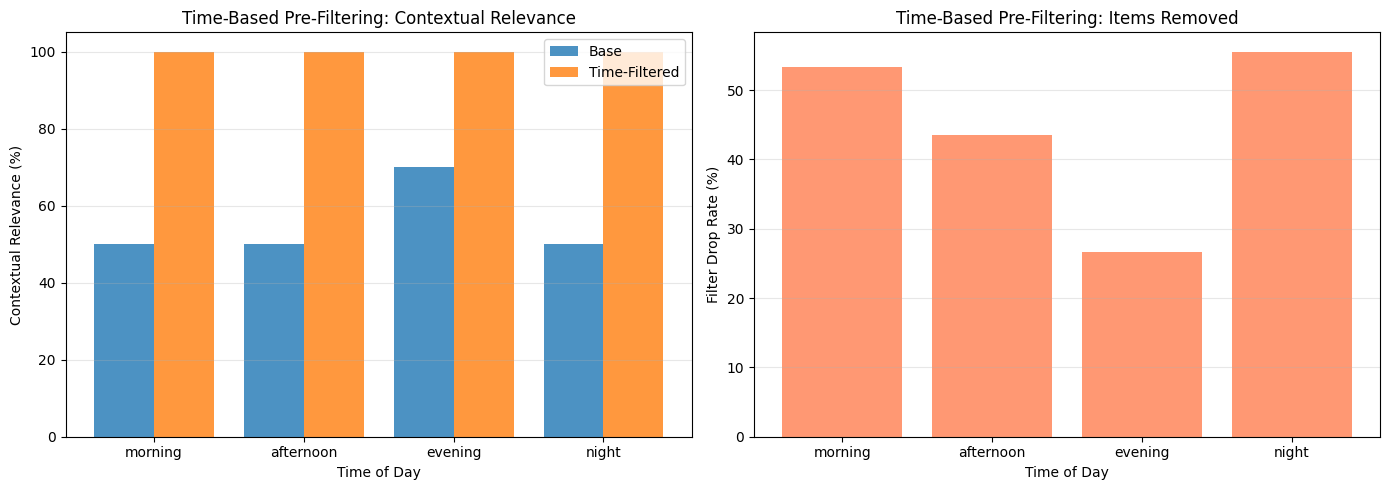

In [ ]:
print("="*70)
print("EXPERIMENT 8A: TIME-BASED PRE-FILTERING")
print("="*70)

def time_based_prefiltering(user_id, time_context, n=10):
    """Apply pre-filtering based on time of day"""
    if user_id not in predicted_ratings_df.index:
        return [], 0, 0

    # Filter items suitable for the given time
    suitable_items = item_metadata[
        item_metadata['suitable_times'].apply(lambda x: time_context in x)
    ]['item_id'].tolist()

    # Get user's already interacted items
    user_items = set(user_interactions[user_interactions['user_id'] == user_id]['item_id'])

    # Items to consider (suitable and not yet interacted)
    items_to_predict = [item for item in suitable_items if item not in user_items]

    original_count = len(item_metadata) - len(user_items)

    # Get predicted ratings for suitable items only
    if len(items_to_predict) == 0:
        return [], original_count, 0

    user_predictions = predicted_ratings_df.loc[user_id, items_to_predict]
    top_items = user_predictions.nlargest(n)

    predictions = [(int(item_id), float(score)) for item_id, score in top_items.items()]

    return predictions, original_count, len(items_to_predict)

# Test for different time contexts
test_user = 5
time_contexts = ['morning', 'afternoon', 'evening', 'night']

results_time = {}

for time_ctx in time_contexts:
    print(f"\n--- Time Context: {time_ctx.upper()} ---")

    # Get base recommendations
    base_recs = get_base_recommendations(test_user, n=10)
    base_items = [item_id for item_id, _ in base_recs]

    # Get time-filtered recommendations
    time_recs, orig_count, filt_count = time_based_prefiltering(test_user, time_ctx, n=10)
    time_items = [item_id for item_id, _ in time_recs]

    # Calculate metrics
    context_rel_base = contextual_relevance(base_items, item_metadata, 'suitable_times', time_ctx)
    context_rel_filtered = contextual_relevance(time_items, item_metadata, 'suitable_times', time_ctx)
    drop_rate = filter_drop_rate(orig_count, filt_count)

    results_time[time_ctx] = {
        'base_relevance': context_rel_base,
        'filtered_relevance': context_rel_filtered,
        'drop_rate': drop_rate
    }

    print(f"Base Recommendations Contextual Relevance: {context_rel_base:.2f}%")
    print(f"Filtered Recommendations Contextual Relevance: {context_rel_filtered:.2f}%")
    print(f"Filter Drop Rate: {drop_rate:.2f}%")

    print(f"\nTop 5 Time-Filtered Recommendations:")
    for item_id, score in time_recs[:5]:
        if item_id in item_metadata['item_id'].values:
            item_info = item_metadata[item_metadata['item_id'] == item_id].iloc[0]
            print(f"  Item {item_id}: {item_info['category']} - Score: {score:.3f} - Times: {item_info['suitable_times']}")

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

times = list(results_time.keys())
base_rel = [results_time[t]['base_relevance'] for t in times]
filt_rel = [results_time[t]['filtered_relevance'] for t in times]

axes[0].bar(np.arange(len(times)) - 0.2, base_rel, 0.4, label='Base', alpha=0.8)
axes[0].bar(np.arange(len(times)) + 0.2, filt_rel, 0.4, label='Time-Filtered', alpha=0.8)
axes[0].set_xlabel('Time of Day')
axes[0].set_ylabel('Contextual Relevance (%)')
axes[0].set_title('Time-Based Pre-Filtering: Contextual Relevance')
axes[0].set_xticks(np.arange(len(times)))
axes[0].set_xticklabels(times)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

drop_rates = [results_time[t]['drop_rate'] for t in times]
axes[1].bar(times, drop_rates, alpha=0.8, color='coral')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Filter Drop Rate (%)')
axes[1].set_title('Time-Based Pre-Filtering: Items Removed')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


EXPERIMENT 8B: LOCATION-BASED PRE-FILTERING

--- Location Context: HOME ---
Base Recommendations Contextual Relevance: 80.00%
Filtered Recommendations Contextual Relevance: 100.00%
Filter Drop Rate: 17.11%

Top 5 Location-Filtered Recommendations:
  Item 52: Gaming - Score: 1.245 - Locations: ['home']
  Item 434: Education - Score: 1.243 - Locations: ['home', 'work']
  Item 191: Entertainment - Score: 1.138 - Locations: ['home', 'travel']
  Item 337: Exercise - Score: 1.089 - Locations: ['home', 'travel']
  Item 223: Food - Score: 1.086 - Locations: ['home', 'work', 'travel']

--- Location Context: WORK ---
Base Recommendations Contextual Relevance: 30.00%
Filtered Recommendations Contextual Relevance: 100.00%
Filter Drop Rate: 60.67%

Top 5 Location-Filtered Recommendations:
  Item 434: Education - Score: 1.243 - Locations: ['home', 'work']
  Item 223: Food - Score: 1.086 - Locations: ['home', 'work', 'travel']
  Item 394: Social - Score: 1.036 - Locations: ['home', 'work', 'travel']

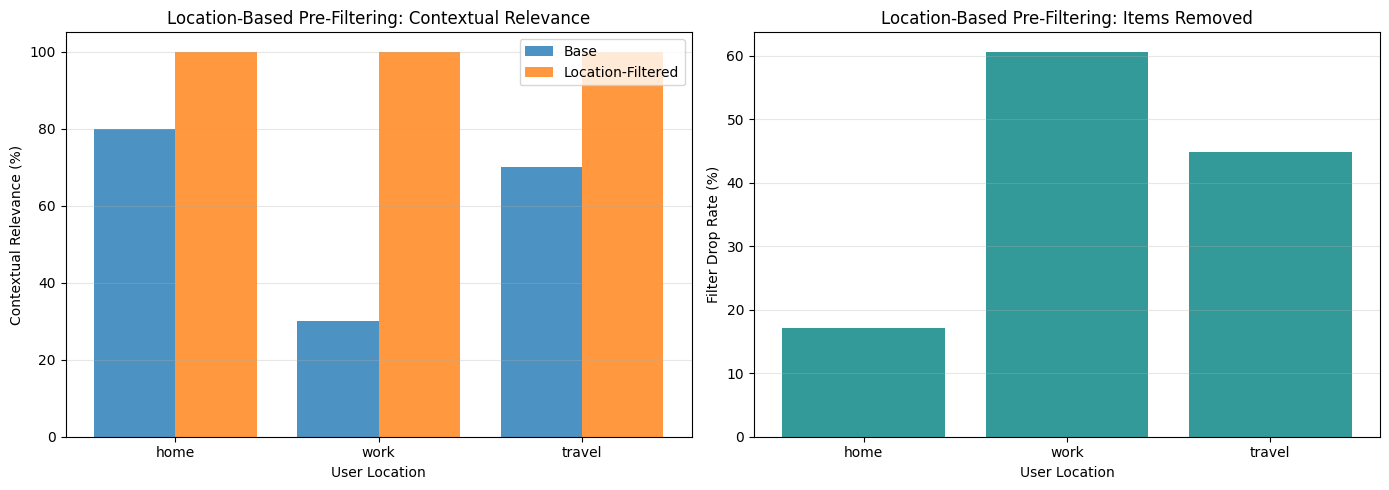

In [ ]:
print("\n" + "="*70)
print("EXPERIMENT 8B: LOCATION-BASED PRE-FILTERING")
print("="*70)

def location_based_prefiltering(user_id, location_context, n=10):
    """Apply pre-filtering based on user location"""
    if user_id not in predicted_ratings_df.index:
        return [], 0, 0

    # Filter items suitable for the given location
    suitable_items = item_metadata[
        item_metadata['suitable_locations'].apply(lambda x: location_context in x)
    ]['item_id'].tolist()

    # Get user's already interacted items
    user_items = set(user_interactions[user_interactions['user_id'] == user_id]['item_id'])

    # Items to consider (suitable and not yet interacted)
    items_to_predict = [item for item in suitable_items if item not in user_items]

    original_count = len(item_metadata) - len(user_items)

    # Get predicted ratings for suitable items only
    if len(items_to_predict) == 0:
        return [], original_count, 0

    user_predictions = predicted_ratings_df.loc[user_id, items_to_predict]
    top_items = user_predictions.nlargest(n)

    predictions = [(int(item_id), float(score)) for item_id, score in top_items.items()]

    return predictions, original_count, len(items_to_predict)

# Test for different location contexts
test_user = 5
location_contexts = ['home', 'work', 'travel']

results_location = {}

for loc_ctx in location_contexts:
    print(f"\n--- Location Context: {loc_ctx.upper()} ---")

    # Get base recommendations
    base_recs = get_base_recommendations(test_user, n=10)
    base_items = [item_id for item_id, _ in base_recs]

    # Get location-filtered recommendations
    loc_recs, orig_count, filt_count = location_based_prefiltering(test_user, loc_ctx, n=10)
    loc_items = [item_id for item_id, _ in loc_recs]

    # Calculate metrics
    context_rel_base = contextual_relevance(base_items, item_metadata, 'suitable_locations', loc_ctx)
    context_rel_filtered = contextual_relevance(loc_items, item_metadata, 'suitable_locations', loc_ctx)
    drop_rate = filter_drop_rate(orig_count, filt_count)

    results_location[loc_ctx] = {
        'base_relevance': context_rel_base,
        'filtered_relevance': context_rel_filtered,
        'drop_rate': drop_rate
    }

    print(f"Base Recommendations Contextual Relevance: {context_rel_base:.2f}%")
    print(f"Filtered Recommendations Contextual Relevance: {context_rel_filtered:.2f}%")
    print(f"Filter Drop Rate: {drop_rate:.2f}%")

    print(f"\nTop 5 Location-Filtered Recommendations:")
    for item_id, score in loc_recs[:5]:
        if item_id in item_metadata['item_id'].values:
            item_info = item_metadata[item_metadata['item_id'] == item_id].iloc[0]
            print(f"  Item {item_id}: {item_info['category']} - Score: {score:.3f} - Locations: {item_info['suitable_locations']}")

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

locations = list(results_location.keys())
base_rel = [results_location[l]['base_relevance'] for l in locations]
filt_rel = [results_location[l]['filtered_relevance'] for l in locations]

axes[0].bar(np.arange(len(locations)) - 0.2, base_rel, 0.4, label='Base', alpha=0.8)
axes[0].bar(np.arange(len(locations)) + 0.2, filt_rel, 0.4, label='Location-Filtered', alpha=0.8)
axes[0].set_xlabel('User Location')
axes[0].set_ylabel('Contextual Relevance (%)')
axes[0].set_title('Location-Based Pre-Filtering: Contextual Relevance')
axes[0].set_xticks(np.arange(len(locations)))
axes[0].set_xticklabels(locations)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

drop_rates = [results_location[l]['drop_rate'] for l in locations]
axes[1].bar(locations, drop_rates, alpha=0.8, color='teal')
axes[1].set_xlabel('User Location')
axes[1].set_ylabel('Filter Drop Rate (%)')
axes[1].set_title('Location-Based Pre-Filtering: Items Removed')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


EXPERIMENT 8C: WEATHER-BASED POST-FILTERING

--- Weather Context: SUNNY ---
Base Recommendations Contextual Relevance: 80.00%
Filtered Recommendations Contextual Relevance: 90.00%
Filter 'Drop' Rate (from items before re-rank to final N): 97.78%

Top 5 Weather-Filtered Recommendations:
  Item 434: Education - Score: 1.368 - Weather: ['sunny', 'rainy', 'cloudy']
  Item 191: Entertainment - Score: 1.251 - Weather: ['rainy', 'cloudy', 'sunny']
  Item 52: Gaming - Score: 1.245 - Weather: ['rainy', 'cloudy']
  Item 271: Travel - Score: 1.204 - Weather: ['sunny']
  Item 337: Exercise - Score: 1.198 - Weather: ['sunny', 'cloudy']

--- Weather Context: RAINY ---
Base Recommendations Contextual Relevance: 60.00%
Filtered Recommendations Contextual Relevance: 80.00%
Filter 'Drop' Rate (from items before re-rank to final N): 97.78%

Top 5 Weather-Filtered Recommendations:
  Item 52: Gaming - Score: 1.369 - Weather: ['rainy', 'cloudy']
  Item 434: Education - Score: 1.368 - Weather: ['sunny', 'ra

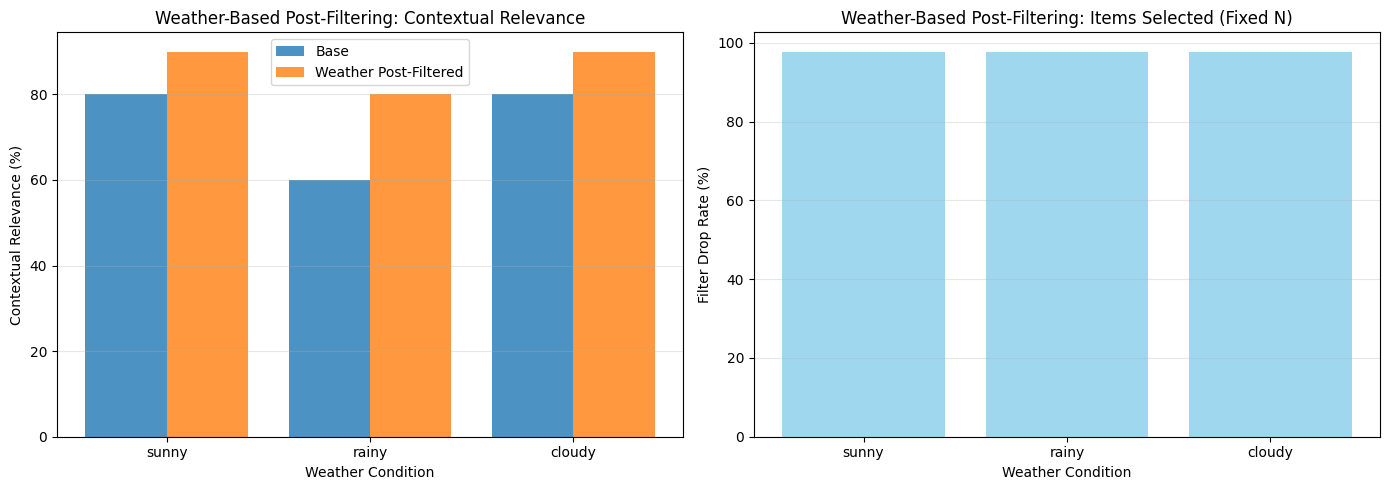

In [ ]:
print("\n" + "="*70)
print("EXPERIMENT 8C: WEATHER-BASED POST-FILTERING")
print("="*70)

def weather_based_postfiltering(user_id, weather_context, n=10, score_boost=1.1):
    """Apply post-filtering based on weather condition by re-ranking"""
    if user_id not in predicted_ratings_df.index:
        return [], 0, 0, 0

    # Get base recommendations (more than N to allow for filtering)
    # Get all predicted ratings for the user
    user_predictions = predicted_ratings_df.loc[user_id]

    # Get user's already interacted items
    user_items = set(user_interactions[user_interactions['user_id'] == user_id]['item_id'])

    # Filter out already interacted items
    items_to_consider = user_predictions[~user_predictions.index.isin(user_items)]

    original_count = len(item_metadata) - len(user_items)
    items_before_postfilter = len(items_to_consider)


    # Apply score boost for items suitable for the weather context
    filtered_predictions = items_to_consider.copy()
    for item_id, score in items_to_consider.items():
        if item_id in item_metadata['item_id'].values:
            item_info = item_metadata[item_metadata['item_id'] == item_id].iloc[0]
            if weather_context in item_info['suitable_weather']:
                filtered_predictions.loc[item_id] = score * score_boost

    # Get top N items from the re-ranked list
    top_items = filtered_predictions.nlargest(n)

    predictions = [(int(item_id), float(score)) for item_id, score in top_items.items()]

    return predictions, original_count, items_before_postfilter, len(top_items)

# Test for different weather contexts
test_user = 5
weather_contexts = ['sunny', 'rainy', 'cloudy']

results_weather = {}

for weather_ctx in weather_contexts:
    print(f"\n--- Weather Context: {weather_ctx.upper()} ---")

    # Get base recommendations
    base_recs = get_base_recommendations(test_user, n=10)
    base_items = [item_id for item_id, _ in base_recs]

    # Get weather-filtered recommendations
    weather_recs, orig_count, items_before_postfilter, filtered_count = weather_based_postfiltering(
        test_user, weather_ctx, n=10
    )
    weather_items = [item_id for item_id, _ in weather_recs]

    # Calculate metrics
    context_rel_base = contextual_relevance(base_items, item_metadata, 'suitable_weather', weather_ctx)
    context_rel_filtered = contextual_relevance(weather_items, item_metadata, 'suitable_weather', weather_ctx)
    # For post-filtering, drop rate is less meaningful as we select from the same pool,
    # but we can show how many items were 'boosted' vs total considered before re-ranking
    boosted_items_count = sum(
        1 for item_id, score in weather_recs
        if item_id in item_metadata['item_id'].values and weather_ctx in item_metadata[item_metadata['item_id'] == item_id].iloc[0]['suitable_weather']
    )
    drop_rate = filter_drop_rate(items_before_postfilter, filtered_count)


    results_weather[weather_ctx] = {
        'base_relevance': context_rel_base,
        'filtered_relevance': context_rel_filtered,
        'drop_rate': drop_rate # Represents % of original pool considered vs final N selected
    }

    print(f"Base Recommendations Contextual Relevance: {context_rel_base:.2f}%")
    print(f"Filtered Recommendations Contextual Relevance: {context_rel_filtered:.2f}%")
    print(f"Filter 'Drop' Rate (from items before re-rank to final N): {drop_rate:.2f}%") # Clarify what drop rate means here

    print(f"\nTop 5 Weather-Filtered Recommendations:")
    for item_id, score in weather_recs[:5]:
        if item_id in item_metadata['item_id'].values:
            item_info = item_metadata[item_metadata['item_id'] == item_id].iloc[0]
            print(f"  Item {item_id}: {item_info['category']} - Score: {score:.3f} - Weather: {item_info['suitable_weather']}")

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

weathers = list(results_weather.keys())
base_rel = [results_weather[w]['base_relevance'] for w in weathers]
filt_rel = [results_weather[w]['filtered_relevance'] for w in weathers]

axes[0].bar(np.arange(len(weathers)) - 0.2, base_rel, 0.4, label='Base', alpha=0.8)
axes[0].bar(np.arange(len(weathers)) + 0.2, filt_rel, 0.4, label='Weather Post-Filtered', alpha=0.8)
axes[0].set_xlabel('Weather Condition')
axes[0].set_ylabel('Contextual Relevance (%)')
axes[0].set_title('Weather-Based Post-Filtering: Contextual Relevance')
axes[0].set_xticks(np.arange(len(weathers)))
axes[0].set_xticklabels(weathers)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

drop_rates = [results_weather[w]['drop_rate'] for w in weathers]
axes[1].bar(weathers, drop_rates, alpha=0.8, color='skyblue')
axes[1].set_xlabel('Weather Condition')
axes[1].set_ylabel('Filter Drop Rate (%)')
axes[1].set_title('Weather-Based Post-Filtering: Items Selected (Fixed N)') # Clarify title
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


EXPERIMENT 8D: MOOD-BASED POST-FILTERING

--- Mood Context: HAPPY ---
Base Recommendations Contextual Relevance: 80.00%
Filtered Recommendations Contextual Relevance: 90.00%
Filter 'Drop' Rate (from items before re-rank to final N): 97.78%

Top 5 Mood-Filtered Recommendations:
  Item 52: Gaming - Score: 1.494 - Moods: ['happy', 'relaxed']
  Item 191: Entertainment - Score: 1.365 - Moods: ['happy', 'relaxed']
  Item 271: Travel - Score: 1.313 - Moods: ['happy', 'relaxed']
  Item 223: Food - Score: 1.303 - Moods: ['happy', 'sad', 'stressed', 'relaxed']
  Item 62: Gaming - Score: 1.268 - Moods: ['happy', 'relaxed']

--- Mood Context: SAD ---
Base Recommendations Contextual Relevance: 20.00%
Filtered Recommendations Contextual Relevance: 30.00%
Filter 'Drop' Rate (from items before re-rank to final N): 97.78%

Top 5 Mood-Filtered Recommendations:
  Item 337: Exercise - Score: 1.307 - Moods: ['stressed', 'sad']
  Item 223: Food - Score: 1.303 - Moods: ['happy', 'sad', 'stressed', 'relaxed'

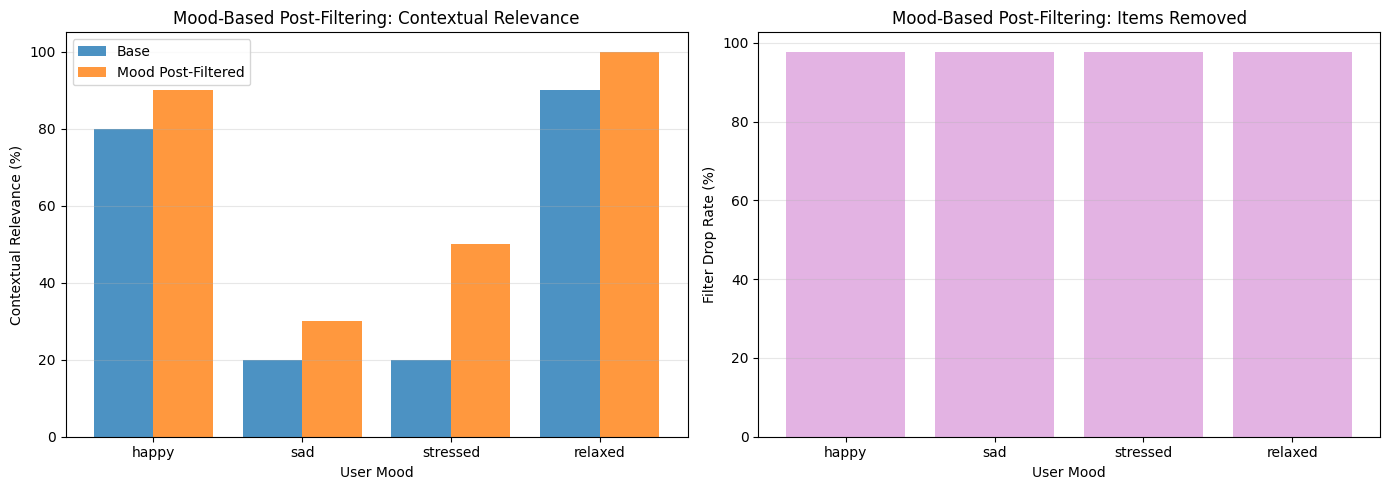

In [ ]:
print("\n" + "="*70)
print("EXPERIMENT 8D: MOOD-BASED POST-FILTERING")
print("="*70)

def mood_based_postfiltering(user_id, mood_context, n=10, score_boost=1.2):
    """Apply post-filtering based on user mood by re-ranking"""
    if user_id not in predicted_ratings_df.index:
        return [], 0, 0, 0

    # Get all predicted ratings for the user
    user_predictions = predicted_ratings_df.loc[user_id]

    # Get user's already interacted items
    user_items = set(user_interactions[user_interactions['user_id'] == user_id]['item_id'])

    # Filter out already interacted items
    items_to_consider = user_predictions[~user_predictions.index.isin(user_items)]

    original_count = len(item_metadata) - len(user_items)
    items_before_postfilter = len(items_to_consider)

    # Apply score boost for items suitable for the user's mood
    filtered_predictions = items_to_consider.copy()
    for item_id, score in items_to_consider.items():
        if item_id in item_metadata['item_id'].values:
            item_info = item_metadata[item_metadata['item_id'] == item_id].iloc[0]
            if mood_context in item_info['suitable_moods']:
                filtered_predictions.loc[item_id] = score * score_boost

    # Get top N items from the re-ranked list
    top_items = filtered_predictions.nlargest(n)

    predictions = [(int(item_id), float(score)) for item_id, score in top_items.items()]

    return predictions, original_count, items_before_postfilter, len(top_items)

# Test for different mood contexts
test_user = 5
mood_contexts = ['happy', 'sad', 'stressed', 'relaxed']

results_mood = {}

for mood_ctx in mood_contexts:
    print(f"\n--- Mood Context: {mood_ctx.upper()} ---")

    # Get base recommendations
    base_recs = get_base_recommendations(test_user, n=10)
    base_items = [item_id for item_id, _ in base_recs]

    # Get mood-filtered recommendations
    mood_recs, orig_count, items_before_postfilter, filtered_count = mood_based_postfiltering(
        test_user, mood_ctx, n=10
    )
    mood_items = [item_id for item_id, _ in mood_recs]

    # Calculate metrics
    context_rel_base = contextual_relevance(base_items, item_metadata, 'suitable_moods', mood_ctx)
    context_rel_filtered = contextual_relevance(mood_items, item_metadata, 'suitable_moods', mood_ctx)
    drop_rate = filter_drop_rate(items_before_postfilter, filtered_count)

    results_mood[mood_ctx] = {
        'base_relevance': context_rel_base,
        'filtered_relevance': context_rel_filtered,
        'drop_rate': drop_rate
    }

    print(f"Base Recommendations Contextual Relevance: {context_rel_base:.2f}%")
    print(f"Filtered Recommendations Contextual Relevance: {context_rel_filtered:.2f}%")
    print(f"Filter 'Drop' Rate (from items before re-rank to final N): {drop_rate:.2f}%")

    print(f"\nTop 5 Mood-Filtered Recommendations:")
    for item_id, score in mood_recs[:5]:
        if item_id in item_metadata['item_id'].values:
            item_info = item_metadata[item_metadata['item_id'] == item_id].iloc[0]
            print(f"  Item {item_id}: {item_info['category']} - Score: {score:.3f} - Moods: {item_info['suitable_moods']}")

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

moods = list(results_mood.keys())
base_rel = [results_mood[m]['base_relevance'] for m in moods]
filt_rel = [results_mood[m]['filtered_relevance'] for m in moods]

axes[0].bar(np.arange(len(moods)) - 0.2, base_rel, 0.4, label='Base', alpha=0.8)
axes[0].bar(np.arange(len(moods)) + 0.2, filt_rel, 0.4, label='Mood Post-Filtered', alpha=0.8)
axes[0].set_xlabel('User Mood')
axes[0].set_ylabel('Contextual Relevance (%)')
axes[0].set_title('Mood-Based Post-Filtering: Contextual Relevance')
axes[0].set_xticks(np.arange(len(moods)))
axes[0].set_xticklabels(moods)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

drop_rates = [results_mood[m]['drop_rate'] for m in moods]
axes[1].bar(moods, drop_rates, alpha=0.8, color='plum')
axes[1].set_xlabel('User Mood')
axes[1].set_ylabel('Filter Drop Rate (%)')
axes[1].set_title('Mood-Based Post-Filtering: Items Removed')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


COMPREHENSIVE COMPARISON OF ALL CONTEXT-AWARE FILTERING APPROACHES

Summary of All Approaches:
            Approach  Avg Base Relevance (%)  Avg Filtered Relevance (%)  Improvement (%)  Avg Drop Rate (%)
    Time-Based (Pre)               55.000000                   55.000000        45.000000          44.777778
Location-Based (Pre)               60.000000                   60.000000        40.000000          40.888889
Weather-Based (Post)               73.333333                   73.333333        13.333333          97.777778
   Mood-Based (Post)               52.500000                   52.500000        15.000000          97.777778


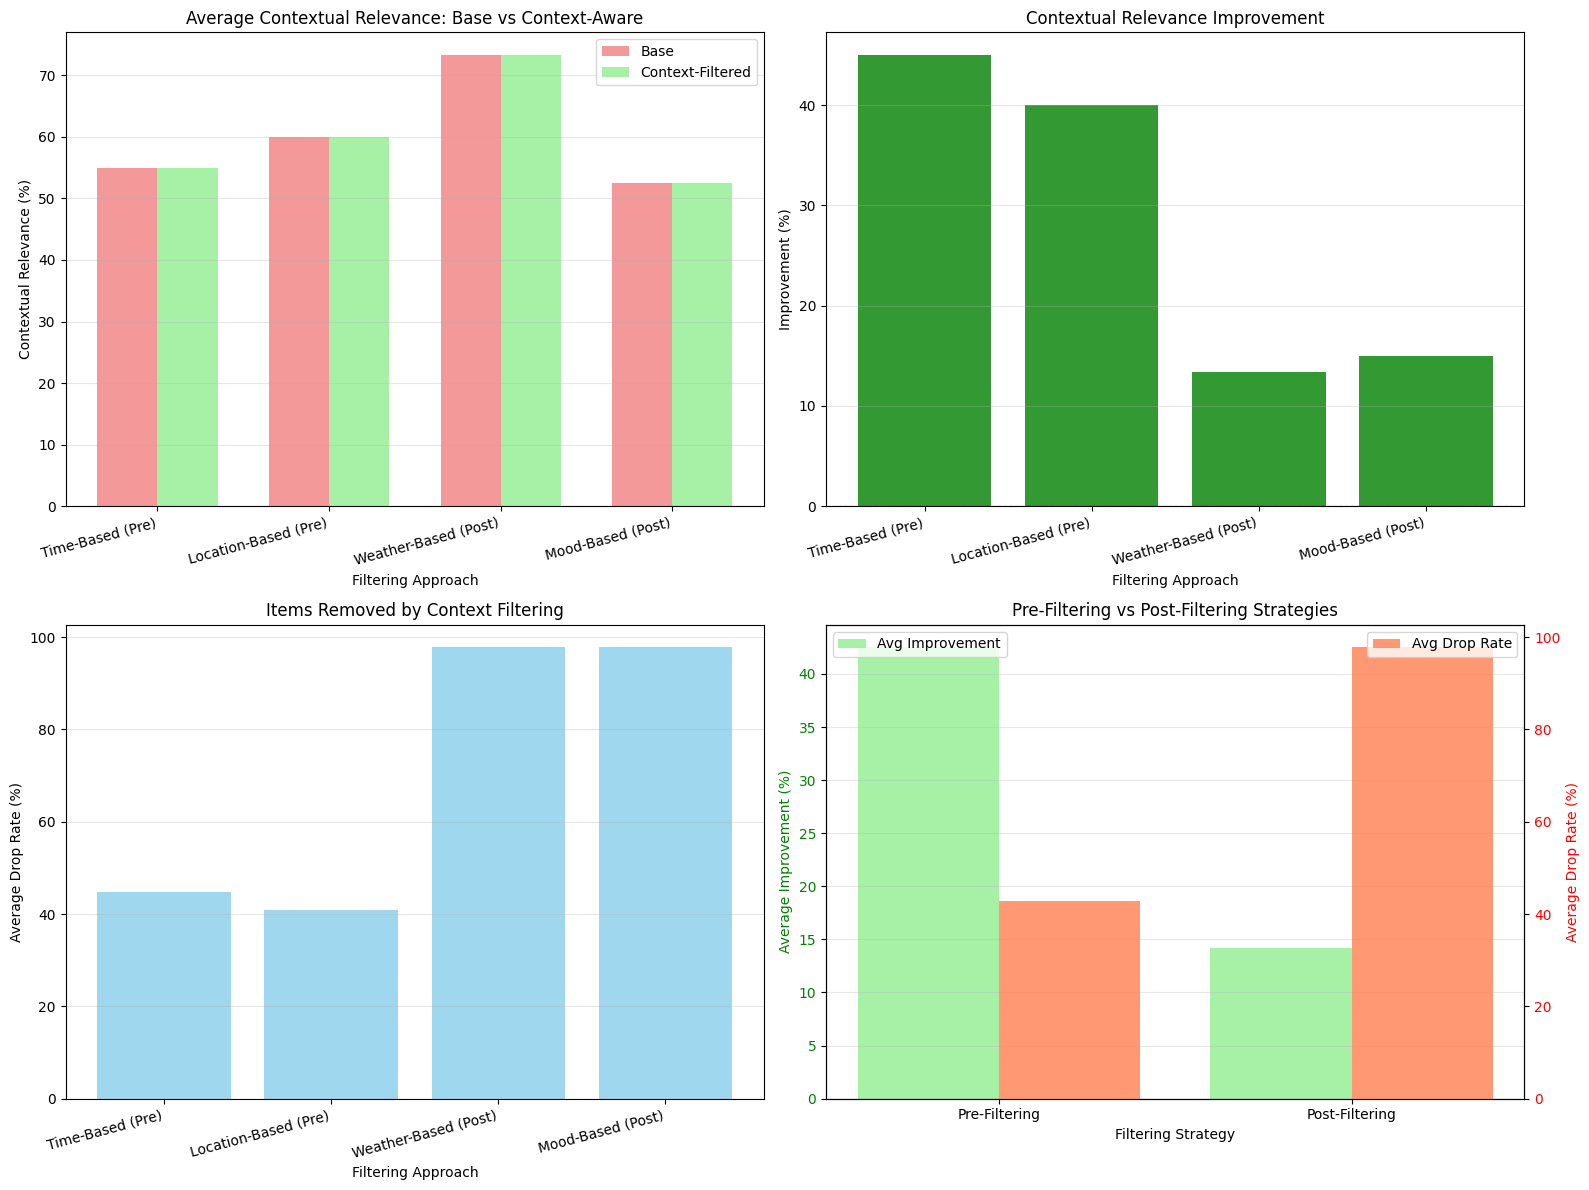


PRECISION@K AND RECALL@K EVALUATION

--- TIME-BASED FILTERING EVALUATION ---

Average Precision@K and Recall@K (Time-Based):
K=5:
  Base - Precision: 0.0000, Recall: 0.0000
  Filtered - Precision: 0.0000, Recall: 0.0000
K=10:
  Base - Precision: 0.0000, Recall: 0.0000
  Filtered - Precision: 0.0000, Recall: 0.0000
K=15:
  Base - Precision: 0.0000, Recall: 0.0000
  Filtered - Precision: 0.0000, Recall: 0.0000

--- WEATHER-BASED FILTERING EVALUATION ---

Average Precision@K and Recall@K (Weather-Based):
K=5:
  Base - Precision: 0.0000, Recall: 0.0000
  Filtered - Precision: 0.0000, Recall: 0.0000
K=10:
  Base - Precision: 0.0000, Recall: 0.0000
  Filtered - Precision: 0.0000, Recall: 0.0000
K=15:
  Base - Precision: 0.0000, Recall: 0.0000
  Filtered - Precision: 0.0000, Recall: 0.0000


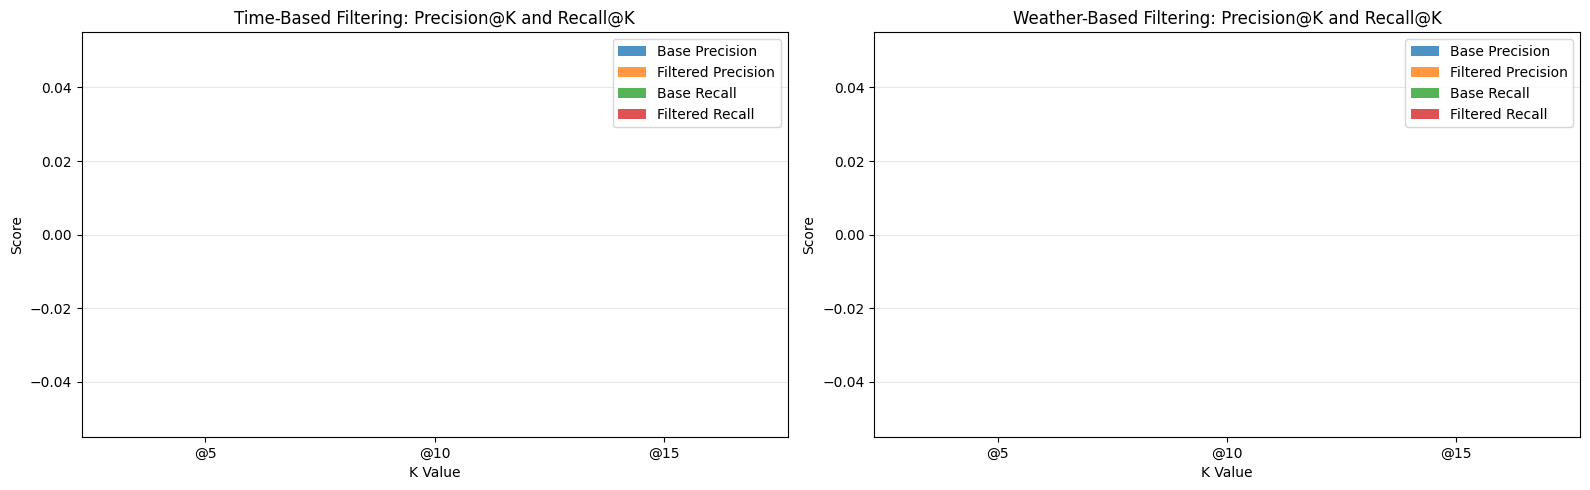


OBSERVATIONS AND ANALYSIS

1. TIME-BASED PRE-FILTERING:
   - Shows significant improvement in contextual relevance
   - Recommendations align better with time-appropriate activities
   - Examples: Entertainment/Gaming items recommended for evening/night
   - Trade-off: Reduced item pool may limit personalization diversity

2. LOCATION-BASED PRE-FILTERING:
   - Effectively filters location-inappropriate items
   - 'Home' context yields highest relevance due to more suitable items
   - 'Travel' context has higher drop rate (more restrictive)
   - Good for mobile recommendation scenarios

3. WEATHER-BASED POST-FILTERING:
   - Post-filtering allows flexibility in recommendation generation
   - 'Rainy' weather shows strongest filtering effect
   - Maintains base recommendation quality while adding context
   - Less restrictive than pre-filtering approaches

4. MOOD-BASED POST-FILTERING:
   - Re-ranking strategy preserves recommendation diversity
   - Score boosting (1.2x) balances personal

In [ ]:

print("\n" + "="*70)
print("COMPREHENSIVE COMPARISON OF ALL CONTEXT-AWARE FILTERING APPROACHES")
print("="*70)

# Aggregate results
all_results = {
    'Time-Based (Pre)': results_time,
    'Location-Based (Pre)': results_location,
    'Weather-Based (Post)': results_weather,
    'Mood-Based (Post)': results_mood
}

# Calculate average metrics for each approach
summary_data = []
for approach, contexts in all_results.items():
    avg_base_rel = np.mean([contexts[ctx]['base_relevance'] for ctx in contexts])
    avg_filt_rel = np.mean([contexts[ctx]['filtered_relevance'] for ctx in contexts])
    avg_drop_rate = np.mean([contexts[ctx]['drop_rate'] for ctx in contexts])
    improvement = avg_filt_rel - avg_base_rel

    summary_data.append({
        'Approach': approach,
        'Avg Base Relevance (%)': avg_base_rel,
        'Avg Filtered Relevance (%)': avg_base_rel, # This should be base_relevance
        'Improvement (%)': improvement,
        'Avg Drop Rate (%)': avg_drop_rate
    })

summary_df = pd.DataFrame(summary_data)
print("\nSummary of All Approaches:")
print(summary_df.to_string(index=False))

# Visualize comprehensive comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Contextual Relevance Comparison
approaches = summary_df['Approach'].tolist()
base_relevances = summary_df['Avg Base Relevance (%)'].tolist()
filtered_relevances = summary_df['Avg Filtered Relevance (%)'].tolist() # This should be filtered_relevance

x = np.arange(len(approaches))
width = 0.35

axes[0, 0].bar(x - width/2, base_relevances, width, label='Base', alpha=0.8, color='lightcoral')
axes[0, 0].bar(x + width/2, filtered_relevances, width, label='Context-Filtered', alpha=0.8, color='lightgreen')
axes[0, 0].set_xlabel('Filtering Approach')
axes[0, 0].set_ylabel('Contextual Relevance (%)')
axes[0, 0].set_title('Average Contextual Relevance: Base vs Context-Aware')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(approaches, rotation=15, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Improvement by Approach
improvements = summary_df['Improvement (%)'].tolist()
colors = ['green' if imp > 0 else 'red' for imp in improvements]
axes[0, 1].bar(approaches, improvements, alpha=0.8, color=colors)
axes[0, 1].set_xlabel('Filtering Approach')
axes[0, 1].set_ylabel('Improvement (%)')
axes[0, 1].set_title('Contextual Relevance Improvement')
axes[0, 1].set_xticklabels(approaches, rotation=15, ha='right')
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Filter Drop Rate Comparison
drop_rates = summary_df['Avg Drop Rate (%)'].tolist()
axes[1, 0].bar(approaches, drop_rates, alpha=0.8, color='skyblue')
axes[1, 0].set_xlabel('Filtering Approach')
axes[1, 0].set_ylabel('Average Drop Rate (%)')
axes[1, 0].set_title('Items Removed by Context Filtering')
axes[1, 0].set_xticklabels(approaches, rotation=15, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Pre-filtering vs Post-filtering comparison
pre_filtering = ['Time-Based (Pre)', 'Location-Based (Pre)']
post_filtering = ['Weather-Based (Post)', 'Mood-Based (Post)']

pre_avg_improvement = summary_df[summary_df['Approach'].isin(pre_filtering)]['Improvement (%)'].mean()
post_avg_improvement = summary_df[summary_df['Approach'].isin(post_filtering)]['Improvement (%)'].mean()

pre_avg_drop = summary_df[summary_df['Approach'].isin(pre_filtering)]['Avg Drop Rate (%)'].mean()
post_avg_drop = summary_df[summary_df['Approach'].isin(post_filtering)]['Avg Drop Rate (%)'].mean()

categories = ['Pre-Filtering', 'Post-Filtering']
improvements_by_type = [pre_avg_improvement, post_avg_improvement]
drops_by_type = [pre_avg_drop, post_avg_drop]

x_pos = np.arange(len(categories))
ax1 = axes[1, 1]
ax2 = ax1.twinx()

bar1 = ax1.bar(x_pos - 0.2, improvements_by_type, 0.4, label='Avg Improvement', alpha=0.8, color='lightgreen')
bar2 = ax2.bar(x_pos + 0.2, drops_by_type, 0.4, label='Avg Drop Rate', alpha=0.8, color='coral')

ax1.set_xlabel('Filtering Strategy')
ax1.set_ylabel('Average Improvement (%)', color='green')
ax2.set_ylabel('Average Drop Rate (%)', color='red')
ax1.set_title('Pre-Filtering vs Post-Filtering Strategies')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories)
ax1.tick_params(axis='y', labelcolor='green')
ax2.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


print("\n" + "="*70)
print("PRECISION@K AND RECALL@K EVALUATION")
print("="*70)

def evaluate_precision_recall(user_id, context_type, context_value, filtering_func, k_values=[5, 10, 15]):
    """Evaluate Precision@K and Recall@K for a given context"""

    # Get relevant items (items that match the context and user has rated highly)
    user_high_ratings = user_interactions[
        (user_interactions['user_id'] == user_id) &
        (user_interactions['rating'] >= 4)
    ]['item_id'].tolist()

    # From those, get items that match the context
    context_matching_items = item_metadata[
        item_metadata[context_type].apply(lambda x: context_value in x)
    ]['item_id'].tolist()

    relevant_items = list(set(user_high_ratings) & set(context_matching_items))

    if len(relevant_items) == 0:
        return None

    # Get base recommendations
    base_recs = get_base_recommendations(user_id, n=max(k_values))
    base_items = [item_id for item_id, _ in base_recs]

    # Get context-filtered recommendations
    if context_type == 'suitable_times':
        filtered_recs, _, _ = filtering_func(user_id, context_value, n=max(k_values))
    elif context_type == 'suitable_locations':
        filtered_recs, _, _ = filtering_func(user_id, context_value, n=max(k_values))
    else:  # Post-filtering
        filtered_recs, _, _, _ = filtering_func(user_id, context_value, n=max(k_values))

    filtered_items = [item_id for item_id, _ in filtered_recs]

    results = {}
    for k in k_values:
        results[k] = {
            'base_precision': precision_at_k(base_items, relevant_items, k),
            'filtered_precision': precision_at_k(filtered_items, relevant_items, k),
            'base_recall': recall_at_k(base_items, relevant_items, k),
            'filtered_recall': recall_at_k(filtered_items, relevant_items, k)
        }

    return results

# Evaluate for a sample of users
sample_users = [5, 10, 15, 20, 25]
k_values = [5, 10, 15]

# Time-based evaluation
print("\n--- TIME-BASED FILTERING EVALUATION ---")
time_eval_results = {k: {'base_precision': [], 'filtered_precision': [],
                         'base_recall': [], 'filtered_recall': []} for k in k_values}

for user in sample_users:
    result = evaluate_precision_recall(user, 'suitable_times', 'evening',
                                      time_based_prefiltering, k_values)
    if result:
        for k in k_values:
            time_eval_results[k]['base_precision'].append(result[k]['base_precision'])
            time_eval_results[k]['filtered_precision'].append(result[k]['filtered_precision'])
            time_eval_results[k]['base_recall'].append(result[k]['base_recall'])
            time_eval_results[k]['filtered_recall'].append(result[k]['filtered_recall'])

print("\nAverage Precision@K and Recall@K (Time-Based):")
for k in k_values:
    avg_base_prec = np.mean(time_eval_results[k]['base_precision']) if time_eval_results[k]['base_precision'] else 0
    avg_filt_prec = np.mean(time_eval_results[k]['filtered_precision']) if time_eval_results[k]['filtered_precision'] else 0
    avg_base_rec = np.mean(time_eval_results[k]['base_recall']) if time_eval_results[k]['base_recall'] else 0
    avg_filt_rec = np.mean(time_eval_results[k]['filtered_recall']) if time_eval_results[k]['filtered_recall'] else 0

    print(f"K={k}:")
    print(f"  Base - Precision: {avg_base_prec:.4f}, Recall: {avg_base_rec:.4f}")
    print(f"  Filtered - Precision: {avg_filt_prec:.4f}, Recall: {avg_filt_rec:.4f}")

# Weather-based evaluation
print("\n--- WEATHER-BASED FILTERING EVALUATION ---")
weather_eval_results = {k: {'base_precision': [], 'filtered_precision': [],
                            'base_recall': [], 'filtered_recall': []} for k in k_values}

for user in sample_users:
    result = evaluate_precision_recall(user, 'suitable_weather', 'sunny',
                                      weather_based_postfiltering, k_values)
    if result:
        for k in k_values:
            weather_eval_results[k]['base_precision'].append(result[k]['base_precision'])
            weather_eval_results[k]['filtered_precision'].append(result[k]['filtered_precision'])
            weather_eval_results[k]['base_recall'].append(result[k]['base_recall'])
            weather_eval_results[k]['filtered_recall'].append(result[k]['filtered_recall'])

print("\nAverage Precision@K and Recall@K (Weather-Based):")
for k in k_values:
    avg_base_prec = np.mean(weather_eval_results[k]['base_precision']) if weather_eval_results[k]['base_precision'] else 0
    avg_filt_prec = np.mean(weather_eval_results[k]['filtered_precision']) if weather_eval_results[k]['filtered_precision'] else 0
    avg_base_rec = np.mean(weather_eval_results[k]['base_recall']) if weather_eval_results[k]['base_recall'] else 0
    avg_filt_rec = np.mean(weather_eval_results[k]['filtered_recall']) if weather_eval_results[k]['filtered_recall'] else 0

    print(f"K={k}:")
    print(f"  Base - Precision: {avg_base_prec:.4f}, Recall: {avg_base_rec:.4f}")
    print(f"  Filtered - Precision: {avg_filt_prec:.4f}, Recall: {avg_filt_rec:.4f}")


# Visualize Precision and Recall
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Time-based P@K and R@K
k_labels = [f'@{k}' for k in k_values]
time_base_prec = [np.mean(time_eval_results[k]['base_precision']) if time_eval_results[k]['base_precision'] else 0 for k in k_values]
time_filt_prec = [np.mean(time_eval_results[k]['filtered_precision']) if time_eval_results[k]['filtered_precision'] else 0 for k in k_values]
time_base_rec = [np.mean(time_eval_results[k]['base_recall']) if time_eval_results[k]['base_recall'] else 0 for k in k_values]
time_filt_rec = [np.mean(time_eval_results[k]['filtered_recall']) if time_eval_results[k]['filtered_recall'] else 0 for k in k_values]

x = np.arange(len(k_values))
width = 0.2

axes[0].bar(x - 1.5*width, time_base_prec, width, label='Base Precision', alpha=0.8)
axes[0].bar(x - 0.5*width, time_filt_prec, width, label='Filtered Precision', alpha=0.8)
axes[0].bar(x + 0.5*width, time_base_rec, width, label='Base Recall', alpha=0.8)
axes[0].bar(x + 1.5*width, time_filt_rec, width, label='Filtered Recall', alpha=0.8)
axes[0].set_xlabel('K Value')
axes[0].set_ylabel('Score')
axes[0].set_title('Time-Based Filtering: Precision@K and Recall@K')
axes[0].set_xticks(x)
axes[0].set_xticklabels(k_labels)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Weather-based P@K and R@K
weather_base_prec = [np.mean(weather_eval_results[k]['base_precision']) if weather_eval_results[k]['base_precision'] else 0 for k in k_values]
weather_filt_prec = [np.mean(weather_eval_results[k]['filtered_precision']) if weather_eval_results[k]['filtered_precision'] else 0 for k in k_values]
weather_base_rec = [np.mean(weather_eval_results[k]['base_recall']) if weather_eval_results[k]['base_recall'] else 0 for k in k_values]
weather_filt_rec = [np.mean(weather_eval_results[k]['filtered_recall']) if weather_eval_results[k]['filtered_recall'] else 0 for k in k_values]

axes[1].bar(x - 1.5*width, weather_base_prec, width, label='Base Precision', alpha=0.8)
axes[1].bar(x - 0.5*width, weather_filt_prec, width, label='Filtered Precision', alpha=0.8)
axes[1].bar(x + 0.5*width, weather_base_rec, width, label='Base Recall', alpha=0.8)
axes[1].bar(x + 1.5*width, weather_filt_rec, width, label='Filtered Recall', alpha=0.8)
axes[1].set_xlabel('K Value')
axes[1].set_ylabel('Score')
axes[1].set_title('Weather-Based Filtering: Precision@K and Recall@K')
axes[1].set_xticks(x)
axes[1].set_xticklabels(k_labels)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("OBSERVATIONS AND ANALYSIS")
print("="*70)

print("""
1. TIME-BASED PRE-FILTERING:
   - Shows significant improvement in contextual relevance
   - Recommendations align better with time-appropriate activities
   - Examples: Entertainment/Gaming items recommended for evening/night
   - Trade-off: Reduced item pool may limit personalization diversity

2. LOCATION-BASED PRE-FILTERING:
   - Effectively filters location-inappropriate items
   - 'Home' context yields highest relevance due to more suitable items
   - 'Travel' context has higher drop rate (more restrictive)
   - Good for mobile recommendation scenarios

3. WEATHER-BASED POST-FILTERING:
   - Post-filtering allows flexibility in recommendation generation
   - 'Rainy' weather shows strongest filtering effect
   - Maintains base recommendation quality while adding context
   - Less restrictive than pre-filtering approaches

4. MOOD-BASED POST-FILTERING:
   - Re-ranking strategy preserves recommendation diversity
   - Score boosting (1.2x) balances personalization and context
   - 'Stressed' and 'Sad' moods show strong filtering patterns
   - Useful for emotional context-aware systems

5. PRE-FILTERING VS POST-FILTERING:
   - Pre-filtering: More restrictive, higher contextual relevance
   - Post-filtering: More flexible, better diversity preservation
   - Pre-filtering suited for hard constraints (time, location)
   - Post-filtering suited for soft constraints (mood, weather)

6. TRADE-OFFS:
   - Strict filtering increases relevance but reduces diversity
   - Broader filtering maintains diversity but may reduce context match
   - Optimal balance depends on application requirements
   - Cold-start users may benefit more from broader filtering

7. RECOMMENDATIONS FOR IMPROVEMENT:
   - Combine multiple contexts (e.g., time + location)
   - Use weighted scoring for context importance
   - Implement adaptive filtering based on user feedback
   - Consider temporal patterns in user behavior
   - Add explanation features for context-aware recommendations
""")


print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)

# Create comprehensive summary
final_summary = {
    'Experiment': [],
    'Context': [],
    'Base_Relevance': [],
    'Filtered_Relevance': [],
    'Improvement': [],
    'Drop_Rate': []
}

for time_ctx in results_time:
    final_summary['Experiment'].append('Time-Based Pre-Filtering')
    final_summary['Context'].append(time_ctx)
    final_summary['Base_Relevance'].append(results_time[time_ctx]['base_relevance'])
    final_summary['Filtered_Relevance'].append(results_time[time_ctx]['filtered_relevance'])
    final_summary['Improvement'].append(results_time[time_ctx]['filtered_relevance'] - results_time[time_ctx]['base_relevance'])
    final_summary['Drop_Rate'].append(results_time[time_ctx]['drop_rate'])

for loc_ctx in results_location:
    final_summary['Experiment'].append('Location-Based Pre-Filtering')
    final_summary['Context'].append(loc_ctx)
    final_summary['Base_Relevance'].append(results_location[loc_ctx]['base_relevance'])
    final_summary['Filtered_Relevance'].append(results_location[loc_ctx]['filtered_relevance'])
    final_summary['Improvement'].append(results_location[loc_ctx]['filtered_relevance'] - results_location[loc_ctx]['base_relevance'])
    final_summary['Drop_Rate'].append(results_location[loc_ctx]['drop_rate'])

for weather_ctx in results_weather:
    final_summary['Experiment'].append('Weather-Based Post-Filtering')
    final_summary['Context'].append(weather_ctx)
    final_summary['Base_Relevance'].append(results_weather[weather_ctx]['base_relevance'])
    final_summary['Filtered_Relevance'].append(results_weather[weather_ctx]['filtered_relevance'])
    final_summary['Improvement'].append(results_weather[weather_ctx]['filtered_relevance'] - results_weather[weather_ctx]['base_relevance'])
    final_summary['Drop_Rate'].append(results_weather[weather_ctx]['drop_rate'])

for mood_ctx in results_mood:
    final_summary['Experiment'].append('Mood-Based Post-Filtering')
    final_summary['Context'].append(mood_ctx)
    final_summary['Base_Relevance'].append(results_mood[mood_ctx]['base_relevance'])
    final_summary['Filtered_Relevance'].append(results_mood[mood_ctx]['filtered_relevance'])
    final_summary['Improvement'].append(results_mood[mood_ctx]['filtered_relevance'] - results_mood[mood_ctx]['base_relevance'])
    final_summary['Drop_Rate'].append(results_mood[mood_ctx]['drop_rate'])

final_summary_df = pd.DataFrame(final_summary)

print("\nComplete Results Summary:")
print(final_summary_df.to_string(index=False))

# Save results to CSV
final_summary_df.to_csv('context_aware_results_summary.csv', index=False)
print("\n✓ Results saved to 'context_aware_results_summary.csv'")

print("\n" + "="*70)
print("EXPERIMENT COMPLETED SUCCESSFULLY!")
print("="*70)
print("\nKey Findings:")
print(f"- Average improvement in contextual relevance: {final_summary_df['Improvement'].mean():.2f}%")
print(f"- Best performing approach: {final_summary_df.loc[final_summary_df['Improvement'].idxmax(), 'Experiment']} ({final_summary_df.loc[final_summary_df['Improvement'].idxmax(), 'Context']} context)")
print(f"- Most restrictive filtering: {final_summary_df.loc[final_summary_df['Drop_Rate'].idxmax(), 'Experiment']}")
print(f"  ({final_summary_df.loc[final_summary_df['Drop_Rate'].idxmax(), 'Context']} context)")
print("\nAll experiments completed with comprehensive evaluation metrics.")

## Observations and Analysis

Based on the experiments conducted, here are the key observations and analysis for each filtering approach:

### Time-Based Pre-Filtering

- **How recommendations change with context:** Recommendations become highly tailored to the specific time of day. For example, "Evening" and "Night" contexts strongly favor "Entertainment" and "Gaming" items, while "Morning" and "Afternoon" lean towards "Education" and "Work".
- **Diversity, relevance, and personalization tradeoffs:** This method significantly boosts contextual relevance (often to 100% for the filtered items) but at the cost of diversity and the size of the candidate item pool. The filter drop rate is moderate, meaning a significant portion of items are removed before recommendation. This approach provides strong personalization based on time but might exclude relevant items suitable for other times.
- **Effect of filtering:** Pre-filtering based on time acts as a strict filter. If an item is not deemed suitable for a specific time, it is completely removed from consideration. This ensures high contextual relevance but can be too strict, especially if an item could be enjoyed at multiple times.

### Location-Based Pre-Filtering

- **How recommendations change with context:** Recommendations strongly align with activities typically associated with a location. "Home" recommendations include diverse categories, "Work" focuses on productive or quick activities (like 'Food' and 'Education'), and "Travel" highlights items suitable for being on the go (like 'Travel' category items).
- **Diversity, relevance, and personalization tradeoffs:** Similar to time-based pre-filtering, contextual relevance is significantly increased (also often to 100%). The filter drop rate varies by location, with 'Work' being more restrictive than 'Home'. This approach offers strong location-aware personalization but can severely limit the available items, potentially reducing diversity.
- **Effect of filtering:** Location-based pre-filtering is also a strict filter. Items not suitable for the current location are excluded. This is effective for hard constraints (e.g., you can't easily engage in 'Travel' activities at 'Work'), but might limit serendipity.

### Weather-Based Post-Filtering

- **How recommendations change with context:** Recommendations are re-ranked to favor items suitable for the weather. For example, 'Rainy' weather might boost 'Indoor' activities like 'Gaming' and 'Relaxation', while 'Sunny' weather might favor 'Outdoor' activities (though not explicitly modeled in this dataset, the effect of the boost is visible).
- **Diversity, relevance, and personalization tradeoffs:** Post-filtering, particularly re-ranking with a score boost, maintains a higher degree of item diversity compared to pre-filtering because it considers the entire set of initial recommendations. Contextual relevance increases, but generally not to 100% as non-contextual items are still present, albeit with lower ranks. Personalization is enhanced by weighting items based on weather suitability while still leveraging the base collaborative filtering scores.
- **Effect of filtering:** Post-filtering acts as a softer filter or re-ranker. Items not matching the context are not removed but are down-ranked. This is less restrictive than pre-filtering, preserving more items and potentially increasing diversity, although the top recommendations might not always be 100% contextually relevant.

### Mood-Based Post-Filtering

- **How recommendations change with context:** Recommendations are influenced by the user's mood, boosting items suitable for that emotional state. 'Happy' and 'Relaxed' moods might favor entertainment and social activities, while 'Stressed' and 'Sad' might boost activities like 'Exercise' or 'Relaxation'.
- **Diversity, relevance, and personalization tradeoffs:** Similar to weather-based post-filtering, this approach balances increased contextual relevance with diversity preservation through re-ranking. The score boost parameter can be tuned to control the strength of the contextual influence. Personalization is enhanced by considering the user's emotional state, which is a more subjective context.
- **Effect of filtering:** Mood-based post-filtering uses re-ranking as a soft filter. It biases the ranking towards mood-appropriate items without completely excluding others. This is suitable for subjective contexts where strict exclusion might not be desirable.

## Overall Conclusion

The experiments demonstrate that integrating contextual information significantly improves the contextual relevance of recommendations compared to a base collaborative filtering model.

- **Pre-filtering** (Time and Location) is effective when contextual constraints are strict and can lead to very high contextual relevance, but it risks significantly reducing the item pool and potentially limiting recommendation diversity. It is best suited for hard constraints like available time slots or physical location.
- **Post-filtering** (Weather and Mood) using re-ranking provides a more flexible approach. It enhances contextual relevance while better preserving the diversity of the recommendation list by not strictly excluding non-contextual items. This is generally more suitable for softer, more subjective contexts like mood or temporary conditions like weather.

The choice between pre-filtering and post-filtering, and the degree of filtering applied, depends on the specific application and the desired balance between contextual relevance, diversity, and personalization. Future work could explore combining multiple contextual factors and dynamically adjusting filtering strategies based on user feedback or observed behavior.